<a href="https://colab.research.google.com/github/dimoralesa/Diplomado_Ciencias_Datos/blob/main/Tareas/Tarea7/Proyecto_Farmacia/Proyecto_Farmacia_cod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final Droguería la especial

In [ ]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

print('version de tf: ', tf.__version__)

from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

version de tf:  2.12.0


In [ ]:
products = pd.read_csv("D:/PHELIPE/UNAL/5 semestre/IA/Proyecto_Farmacia/Proyecto_Farmacia/csv/productDim.csv",encoding='utf-16')
products = products[["codigo","name"]]
products

,codigo,name
0,0000000000,TIJERA GRANDE C2009
1,000000305,SM CORRECTOR 3B #2 4.5G
2,000000306,SM CORRECTOR 3B #3 4.5G
3,000002110,NAI RUB INDIV PLATA # 08 -10 3G
4,000002111,NAI RUB INDIV PLATA #19 3G
...,...,...
12477,PROM3,PROM3
12478,PROM4,PROM4
12479,PROM8,PROM8
12480,SPEEDBOTELLA,SPEED MAX 250 ML UNIDAD


In [ ]:
products['name']

0                    TIJERA GRANDE  C2009
1                 SM CORRECTOR 3B #2 4.5G
2                 SM CORRECTOR 3B #3 4.5G
3        NAI RUB INDIV PLATA  # 08 -10 3G
4             NAI RUB INDIV PLATA  #19 3G
                       ...               
12477                               PROM3
12478                               PROM4
12479                               PROM8
12480             SPEED MAX 250 ML UNIDAD
12481                  TAPABOCAS LAVABLES
Name: name, Length: 12482, dtype: object

In [ ]:
ventas = pd.read_csv("D:/PHELIPE/UNAL/5 semestre/IA/Proyecto_Farmacia/Proyecto_Farmacia/csv/ventas_modificado.csv")
ventas

,Codigo,Nombre,Tipo,Laboratorio,Venta Neta,Cant Vendidas,Inv Actual,Prom Ventas,Costo Venta,Utilidad,% Utilidad,Dias Inv,Ultima Venta,Dias Sin Venta,DiasPeriodo,DiasVenta,FechaReporte
0,100007820,AMOXICILINA 500 MG 50 CAPSULAS AG,GENERICOS,LABORATORIO FRANCO COLOMB,22500,50,630,50,10425,12075.0,0.5367,12.6,2023-03-15,0,1,1,2022-06-23
1,100015063,BACIPREX 500 MG 50 CAP ICOM (RF),NaN,N/A,50000,50,230,50,15956,34044.0,0.6809,4.6,2023-03-15,0,1,1,2022-06-23
2,200038455,TOA.NOSOTRAS INVISIB.RAPIGEL DISP.30 UND,PROTECCION FEMENINA,PRODUCTOS FAMILIA S.A.,11700,30,90,30,9761,1939.0,0.1657,3.0,2023-03-01,14,1,1,2022-06-23
3,100012732,ACETAMINOFEN 500 MG 100 TABLETAS AG,GENERICOS,LABORATORIO FRANCO COLOMB,4500,30,2560,30,1740,2760.0,0.6133,85.3,2023-03-15,0,1,1,2022-06-23
4,100020023,LOSARTAN 50 MG 300 TBS EC,NaN,N/A,6000,30,0,30,2985,3015.0,0.5025,0.0,2022-12-10,95,1,1,2022-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620332,100018298,CARBAMAZEPINA 2% SUSPENSION 120 ML RC,NaN,N/A,0,0,1,0,0,0.0,0.0000,0.0,NaN,-1,1,0,2022-10-13
2620333,123563,ACOND.LISSIA RIZOS PLUS 425 ML CAPIBEL,NaN,N/A,0,0,1,0,0,0.0,0.0000,0.0,NaN,-1,1,0,2022-10-13
2620334,100018677,A-CERUMEN SPRAY 40 ML,NaN,N/A,0,0,0,0,0,0.0,0.0000,0.0,2023-03-14,1,1,0,2022-10-13
2620335,100025425,CICLOBENZAPRINA 10 MG. 30 TBS MOMENTA,NaN,N/A,0,0,1,0,0,0.0,0.0000,0.0,NaN,-1,1,0,2022-10-13


In [ ]:
ventas.columns

Index(['Codigo', 'Nombre', 'Tipo', 'Laboratorio', 'Venta Neta',
       'Cant Vendidas', 'Inv Actual', 'Prom Ventas', 'Costo Venta', 'Utilidad',
       '% Utilidad', 'Dias Inv', 'Ultima Venta', 'Dias Sin Venta',
       'DiasPeriodo', 'DiasVenta', 'FechaReporte'],
      dtype='object')

In [ ]:
features_considered = ['Cant Vendidas', 'Inv Actual', 'Dias Inv','% Utilidad']

Sales = ventas.merge(products,left_on="Codigo",right_on="codigo",how="left").sort_values(by=["FechaReporte"],ascending=True)
Sales = Sales[['Codigo','name']+features_considered]
Sales.index = ventas['FechaReporte']
Sales

,Codigo,name,Cant Vendidas,Inv Actual,Dias Inv,% Utilidad
FechaReporte,,,,,,
2022-06-23,100024540,AMIKACINA 500 MG/2 ML 10 AMPOLLAS VT,0,1,0.0,0.0
2022-06-23,7702186022816,NAI RUBOR DUO PLATA #3 5G,0,0,0.0,0.0
2022-06-23,200029308,ALMIPRO EMOLIENTE 400 GR,0,0,0.0,0.0
2022-06-23,7702433287661,SOMBRAS VOUGUE SURTIDO,0,0,0.0,0.0
2022-06-23,100023087,BISOPROLOL 5 MG GENFAR X 30,0,1,0.0,0.0
...,...,...,...,...,...,...
2022-10-13,100005815,CREMA # 4 110 GR,0,5,0.0,0.0
2022-10-13,100005931,NORFLOXACINA 400 MG 14 TABLETAS MK,0,0,0.0,0.0
2022-10-13,100005928,NORAVER MENTA SPRAY 120 ML,0,2,0.0,0.0


In [ ]:
codigos=(Sales
 .groupby("Codigo")
 .agg(codigo1=("Codigo","nunique"),Venta = ("Cant Vendidas","sum")).sort_values(by=["Venta"],ascending=False)).reset_index()
codigos=np.array(codigos['Codigo'])
codigos

array(['100012732', '200041076', '100016320', ..., '200020612',
       '200020647', 'T1500'], dtype=object)

In [ ]:
cod = '100024111'
ups = Sales.query("Codigo== '"+cod+"' ").sort_values(by=["FechaReporte"],ascending=True)
ups = ups[features_considered]
ups


,Cant Vendidas,Inv Actual,Dias Inv,% Utilidad
FechaReporte,,,,
2022-03-17,0,405,0.0,0.0000
2022-03-18,0,405,0.0,0.0000
2022-03-19,0,405,0.0,0.0000
2022-03-20,0,405,0.0,0.0000
2022-03-21,0,405,0.0,0.0000
...,...,...,...,...
2023-03-12,0,405,0.0,0.0000
2023-03-13,30,405,13.5,0.6522
2023-03-14,0,405,0.0,0.0000


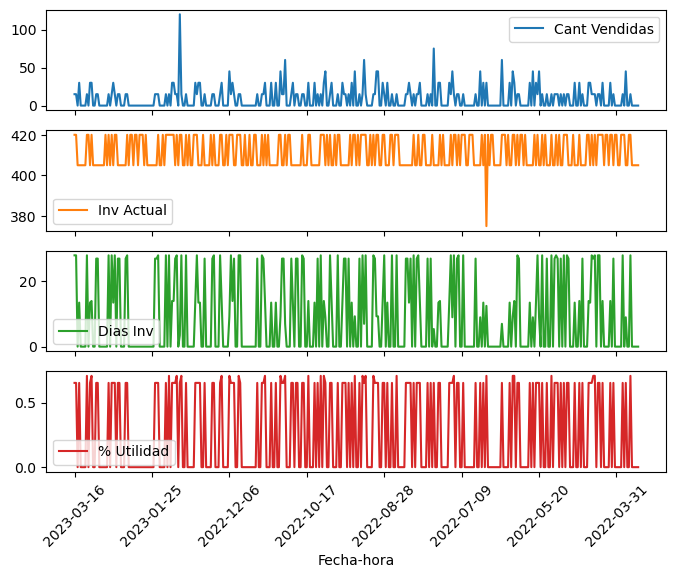

In [ ]:
ups.plot(subplots=True, rot=45, xlabel='Fecha-hora')
plt.show()

In [ ]:
 def multivariate_data(dataset, target, start_index, end_index, history_size,
                          target_size, step, single_step=False):
        ''' dataset: conjunto de datos para las secuencias de entrada
            target:  conjunto de datos para las secuencias de salida
            start_index: índice inicial de donde empezar a tomar los datos
            end_index: índice final para tomar los datos. None para tomarlos todos
            history_size: tamaño de la venytana para crear las secuencias
            target_size: dentro de cuántas observaciones futuras desea pronosticar
            step: Cada cuántas observaciones deben tomarse. Para secuencias muy largas
                  que no cambia mucho localmente
            single_step: Predecir solamente un valor futuro (=True),
                         o predecir todos los valores hasta target_size(=False)
        '''
        data = []
        labels = []

        start_index = start_index + history_size
        if end_index is None:
            end_index = len(dataset) - target_size

        for i in range(start_index, end_index):
            indices = range(i-history_size, i, step)
            data.append(dataset[indices])

            if single_step:
                labels.append(target[i+target_size])
            else:
                labels.append(target[i:i+target_size])

        return np.array(data), np.array(labels)


def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Pérdida entrenamiento')
    plt.plot(epochs, val_loss, 'r', label='Pérdida validación')
    plt.title(title)
    plt.legend()

    plt.show()

def create_time_steps(length):
    return list(range(-length, 0))

def show_plot(plot_data, delta, title):
    labels = ['Historia', 'Futuro Verdadero' , 'Predicción del Modelo']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Salto de tiempo (Time-Step)')
    return plt

def plot_series(y_test,y_pred, title, x_label, y_label,rms,epochs):
    plt.plot(np.arange(0, len(y_test)), y_test, marker='.', label="verdadero")
    plt.plot(np.arange(0, len(y_test)), y_pred, marker='+', label="predicho")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate("rms="+str(round(rms,2)) , xy=(400, 1.3), size = 10)
    plt.annotate("epochs="+str(epochs) , xy=(400, 1.5), size = 10)
    plt.title(title)
    plt.legend()
    plt.show()


def multi_step_plot(history, true_future, prediction):
      plt.figure(figsize=(12, 6))
      num_in = create_time_steps(len(history))
      num_out = len(true_future)

      plt.plot(num_in, np.array(history[:, 1]), label='History')
      plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
               label='True Future')
      if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
                 label='Predicted Future')
      plt.legend(loc='upper left')
      plt.show()

In [ ]:
class Serie1():


    features_considered = ['Cant Vendidas', 'Inv Actual', 'Dias Inv','% Utilidad']


    def __init__(self,data,cod):

        self.cod = cod
        ups = data.query("Codigo== '"+cod+"' ").sort_values(by=["FechaReporte"],ascending=True)
        self.name = ups['name'].unique()[0]
        self.data = ups[features_considered]
        dataset = self.data.values
        data_mean = dataset[:275].mean(axis=0)
        data_std = dataset[:275].std(axis=0)
        dataset = (dataset-data_mean)/data_std
        self.dataset = np.nan_to_num(dataset,nan=0)
        self.X_train,self.Y_train =multivariate_data(self.dataset, self.dataset[:, 1], start_index =0, end_index=275, history_size=30,target_size=1,step=1)
        self.x_val_multi, self.y_val_multi = multivariate_data(self.dataset,self.dataset[:, 1],
                                                     245, None, 30,
                                                     1, 1)


        BATCH_SIZE = 256
        BUFFER_SIZE = 10000

        train_data_multi = tf.data.Dataset.from_tensor_slices((self.X_train, self.Y_train))
        self.train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

        val_data_multi = tf.data.Dataset.from_tensor_slices((self.x_val_multi, self.y_val_multi))
        self.val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

        self.multi_step_model = tf.keras.models.Sequential()
        self.multi_step_model.add(tf.keras.layers.LSTM(32,
                                                  return_sequences=True,
                                                  input_shape=self.X_train.shape[-2:]))
        self.multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
        self.multi_step_model.add(tf.keras.layers.Dense(1))

        self.multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

        self.multi_step_history = self.multi_step_model.fit(self.train_data_multi, epochs=15,
                                          steps_per_epoch=200,
                                          validation_data=self.val_data_multi,
                                          validation_steps=50)
        y_pred = self.multi_step_model.predict(self.x_val_multi)
        self.y_pred = np.squeeze(y_pred,axis=1)
        self.y_test = self.y_val_multi

        self.mse = np.sqrt(np.mean(np.power(self.y_pred-self.y_test,2)))

In [ ]:
multi_step_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 32)            4736      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 7,889
Trainable params: 7,889
Non-trainable params: 0
_________________________________________________________________


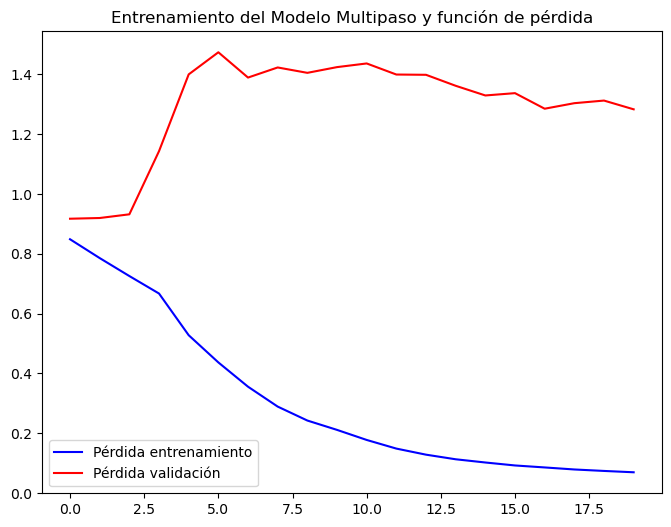

In [ ]:
plot_train_history(multi_step_history, 'Entrenamiento del Modelo Multipaso y función de pérdida')

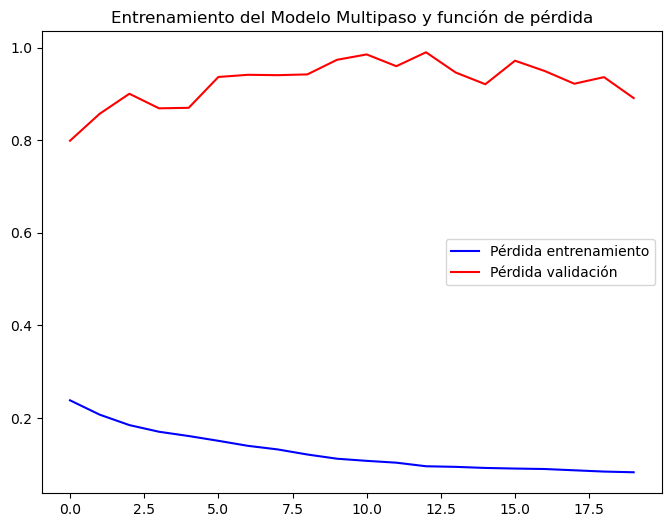

In [ ]:
plot_train_history(multi_step_history, 'Entrenamiento del Modelo Multipaso y función de pérdida')

In [ ]:
rmsLSTM = np.sqrt(np.mean(np.power(y_pred-y_test,2)))
print(rmsLSTM )

1.6709648754839475


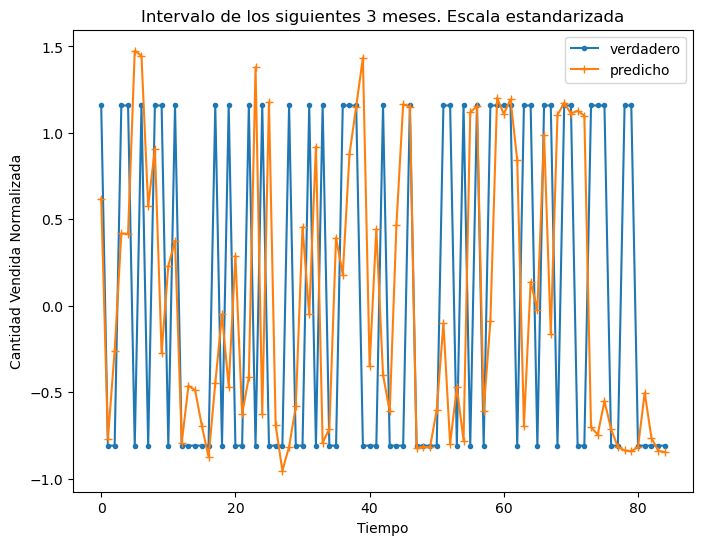

In [ ]:
title = "Intervalo de los siguientes 3 meses. Escala estandarizada"
x_label = 'Tiempo'
y_label = 'Cantidad Vendida Normalizada'
rms = rmsLSTM
plot_series(y_test[:2000], y_pred[:2000],title,x_label, y_label, rms,epochs=10 )

Epoch 1/15
200/200 [==============================] - 8s 31ms/step - loss: 0.8179 - val_loss: 0.8340
Epoch 2/15
200/200 [==============================] - 6s 29ms/step - loss: 0.7432 - val_loss: 1.1404
Epoch 3/15
200/200 [==============================] - 6s 29ms/step - loss: 0.5836 - val_loss: 1.6531
Epoch 4/15
200/200 [==============================] - 6s 29ms/step - loss: 0.4522 - val_loss: 1.8583
Epoch 5/15
200/200 [==============================] - 6s 29ms/step - loss: 0.3556 - val_loss: 2.0530
Epoch 6/15
200/200 [==============================] - 6s 29ms/step - loss: 0.2884 - val_loss: 2.0184
Epoch 7/15
200/200 [==============================] - 6s 29ms/step - loss: 0.2375 - val_loss: 2.0627
Epoch 8/15
200/200 [==============================] - 6s 29ms/step - loss: 0.2042 - val_loss: 1.9525
Epoch 9/15
200/200 [==============================] - 6s 29ms/step - loss: 0.1808 - val_loss: 2.0541
Epoch 10/15
200/200 [==============================] - 6s 29ms/step - loss: 0.1627 - val_lo

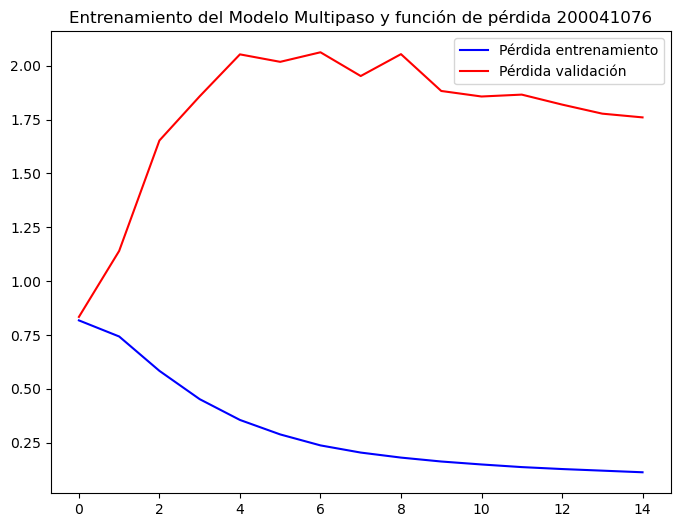

mse = 1.9919431806469607


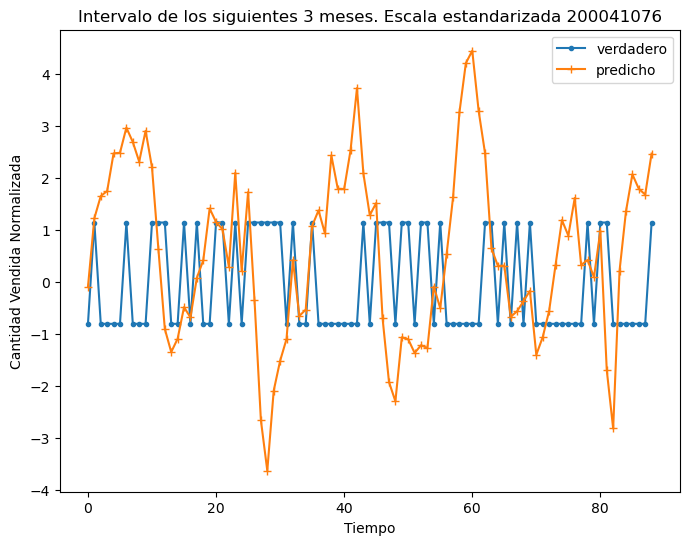

In [ ]:


for j in ['200041076']:
    title = "Intervalo de los siguientes 3 meses. Escala estandarizada "+j
    x_label = 'Tiempo'
    y_label = 'Cantidad Vendida Normalizada'
    ejem = Serie1(Sales,j)
    plot_train_history(ejem.multi_step_history, 'Entrenamiento del Modelo Multipaso y función de pérdida '+j)
    print("mse =",ejem.mse)
    plot_series(ejem.y_test[:2000], ejem.y_pred[:2000],title,x_label, y_label, ejem.mse,epochs=15 )

C:\Users\DIEGO.DESKTOP-E4FILMK\AppData\Local\Temp\ipykernel_14428\3260244118.py:16: RuntimeWarning: invalid value encountered in divide
  dataset = (dataset-data_mean)/data_std


Epoch 1/15
200/200 [==============================] - 8s 30ms/step - loss: 0.0016 - val_loss: 4.6749e-04
Epoch 2/15
200/200 [==============================] - 6s 28ms/step - loss: 5.0001e-04 - val_loss: 4.6749e-04
Epoch 3/15
200/200 [==============================] - 6s 28ms/step - loss: 5.0001e-04 - val_loss: 4.6749e-04
Epoch 4/15
200/200 [==============================] - 6s 28ms/step - loss: 5.0001e-04 - val_loss: 4.6749e-04
Epoch 5/15
200/200 [==============================] - 6s 28ms/step - loss: 5.0001e-04 - val_loss: 4.6749e-04
Epoch 6/15
200/200 [==============================] - 6s 28ms/step - loss: 5.0001e-04 - val_loss: 4.6749e-04
Epoch 7/15
200/200 [==============================] - 6s 28ms/step - loss: 5.0001e-04 - val_loss: 4.6749e-04
Epoch 8/15
200/200 [==============================] - 6s 28ms/step - loss: 5.0001e-04 - val_loss: 4.6749e-04
Epoch 9/15
200/200 [==============================] - 6s 28ms/step - loss: 5.0001e-04 - val_loss: 4.6749e-04
Epoch 10/15
200/200 [==

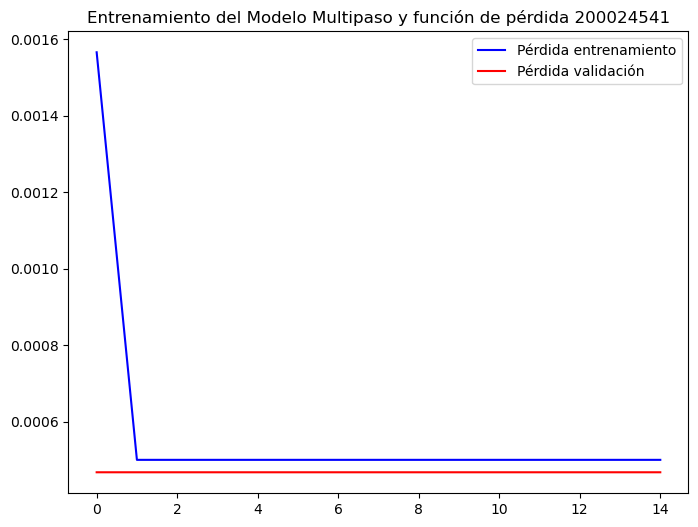

mse = 0.0004675027835196284


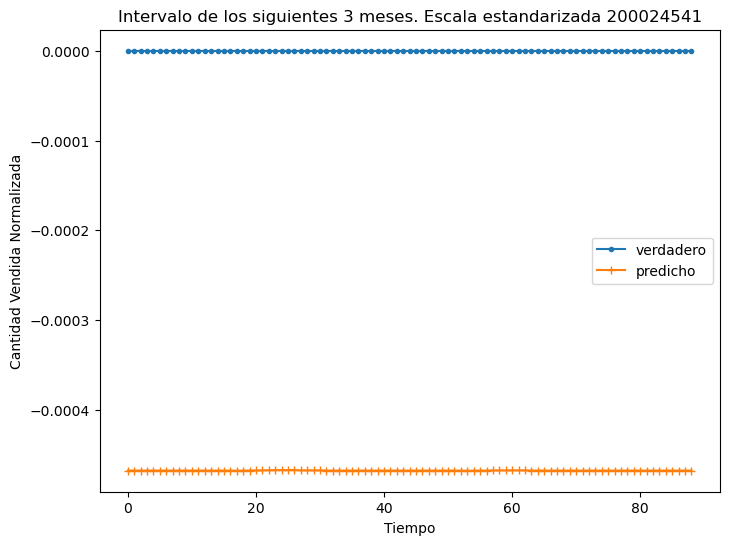

Epoch 1/15
200/200 [==============================] - 8s 30ms/step - loss: 0.8391 - val_loss: 0.8527
Epoch 2/15
200/200 [==============================] - 6s 28ms/step - loss: 0.8176 - val_loss: 0.8527
Epoch 3/15
200/200 [==============================] - 6s 28ms/step - loss: 0.7457 - val_loss: 0.9473
Epoch 4/15
200/200 [==============================] - 6s 28ms/step - loss: 0.6377 - val_loss: 1.0570
Epoch 5/15
200/200 [==============================] - 6s 28ms/step - loss: 0.5232 - val_loss: 1.2712
Epoch 6/15
200/200 [==============================] - 6s 28ms/step - loss: 0.4376 - val_loss: 1.4732
Epoch 7/15
200/200 [==============================] - 6s 28ms/step - loss: 0.3799 - val_loss: 1.6978
Epoch 8/15
200/200 [==============================] - 6s 28ms/step - loss: 0.3247 - val_loss: 1.8684
Epoch 9/15
200/200 [==============================] - 6s 28ms/step - loss: 0.2714 - val_loss: 1.9040
Epoch 10/15
200/200 [==============================] - 6s 29ms/step - loss: 0.2347 - val_lo

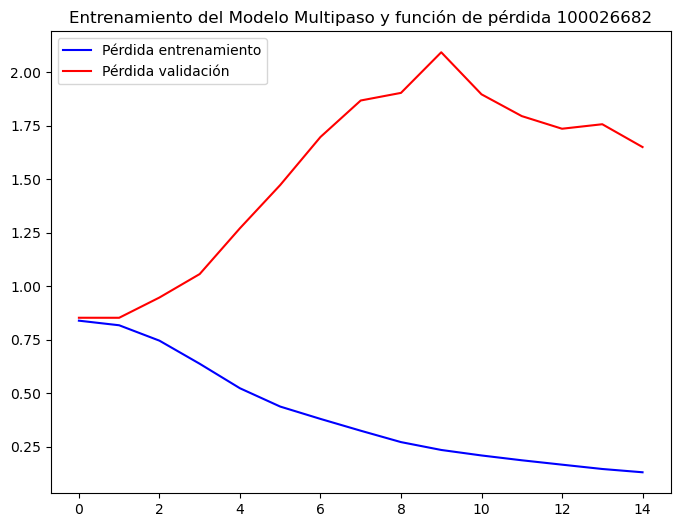

mse = 2.125055280391486


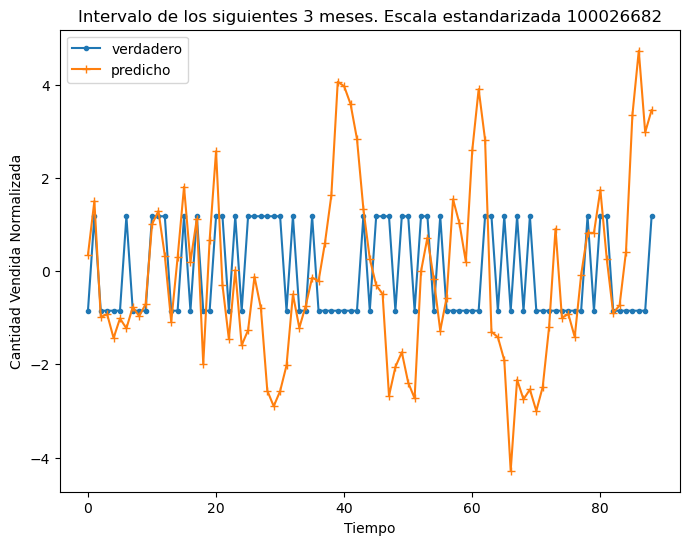

C:\Users\DIEGO.DESKTOP-E4FILMK\AppData\Local\Temp\ipykernel_14428\3260244118.py:16: RuntimeWarning: invalid value encountered in divide
  dataset = (dataset-data_mean)/data_std


Epoch 1/15
200/200 [==============================] - 8s 32ms/step - loss: 0.0021 - val_loss: 8.0447e-04
Epoch 2/15
200/200 [==============================] - 7s 34ms/step - loss: 5.7129e-04 - val_loss: 9.8028e-04
Epoch 3/15
200/200 [==============================] - 7s 34ms/step - loss: 5.3985e-04 - val_loss: 9.8801e-04
Epoch 4/15
200/200 [==============================] - 7s 34ms/step - loss: 5.2973e-04 - val_loss: 9.8027e-04
Epoch 5/15
200/200 [==============================] - 7s 35ms/step - loss: 5.2336e-04 - val_loss: 9.8027e-04
Epoch 6/15
200/200 [==============================] - 7s 34ms/step - loss: 5.2050e-04 - val_loss: 9.8027e-04
Epoch 7/15
200/200 [==============================] - 7s 34ms/step - loss: 5.1837e-04 - val_loss: 9.8027e-04
Epoch 8/15
200/200 [==============================] - 7s 34ms/step - loss: 5.1704e-04 - val_loss: 9.8027e-04
Epoch 9/15
200/200 [==============================] - 7s 35ms/step - loss: 5.1533e-04 - val_loss: 9.8027e-04
Epoch 10/15
200/200 [==

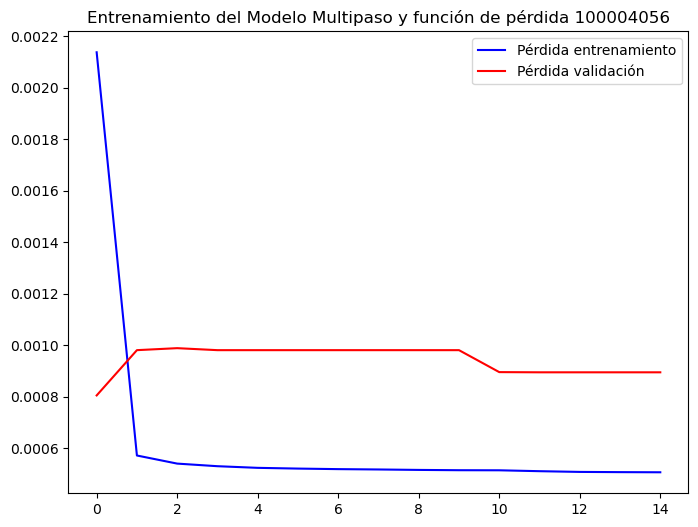

mse = 0.0008942704880610108


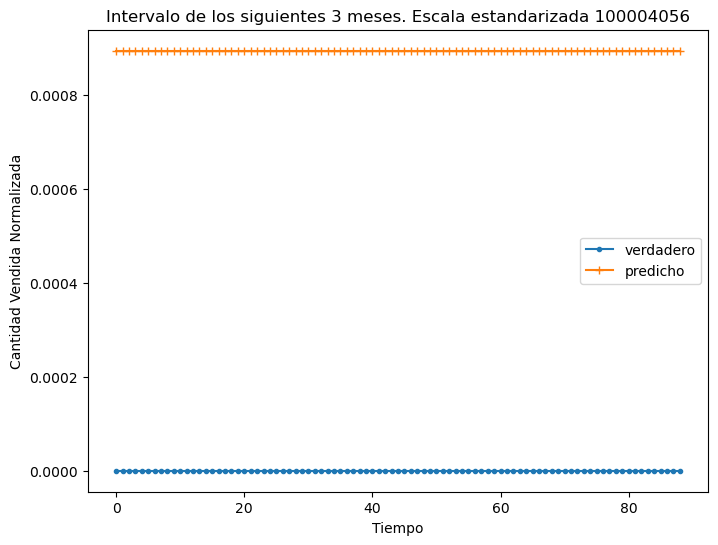

C:\Users\DIEGO.DESKTOP-E4FILMK\AppData\Local\Temp\ipykernel_14428\3260244118.py:16: RuntimeWarning: invalid value encountered in divide
  dataset = (dataset-data_mean)/data_std


Epoch 1/15
200/200 [==============================] - 9s 34ms/step - loss: 0.0050 - val_loss: 0.0013
Epoch 2/15
200/200 [==============================] - 6s 31ms/step - loss: 0.0025 - val_loss: 6.5993e-04
Epoch 3/15
200/200 [==============================] - 6s 31ms/step - loss: 8.0407e-04 - val_loss: 7.5086e-04
Epoch 4/15
200/200 [==============================] - 6s 31ms/step - loss: 5.3977e-04 - val_loss: 7.2601e-04
Epoch 5/15
200/200 [==============================] - 6s 31ms/step - loss: 5.2594e-04 - val_loss: 8.0293e-04
Epoch 6/15
200/200 [==============================] - 6s 32ms/step - loss: 5.1503e-04 - val_loss: 8.3727e-04
Epoch 7/15
200/200 [==============================] - 6s 32ms/step - loss: 5.0463e-04 - val_loss: 8.6188e-04
Epoch 8/15
200/200 [==============================] - 6s 32ms/step - loss: 5.0170e-04 - val_loss: 8.6351e-04
Epoch 9/15
200/200 [==============================] - 6s 32ms/step - loss: 5.0074e-04 - val_loss: 8.6352e-04
Epoch 10/15
200/200 [==========

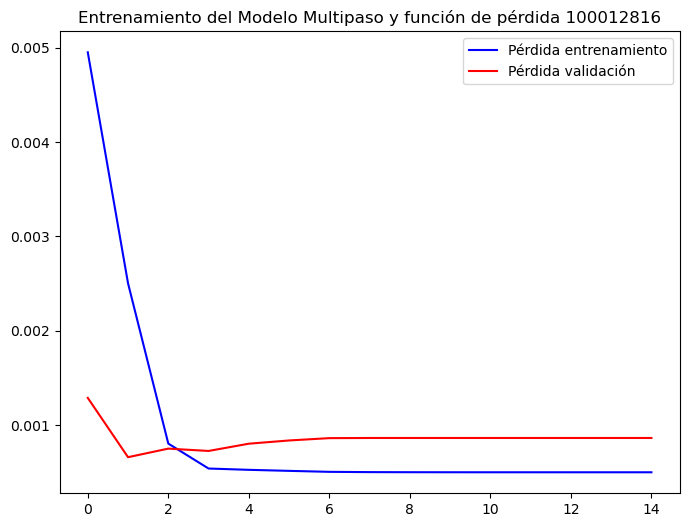

mse = 0.0008635181512477373


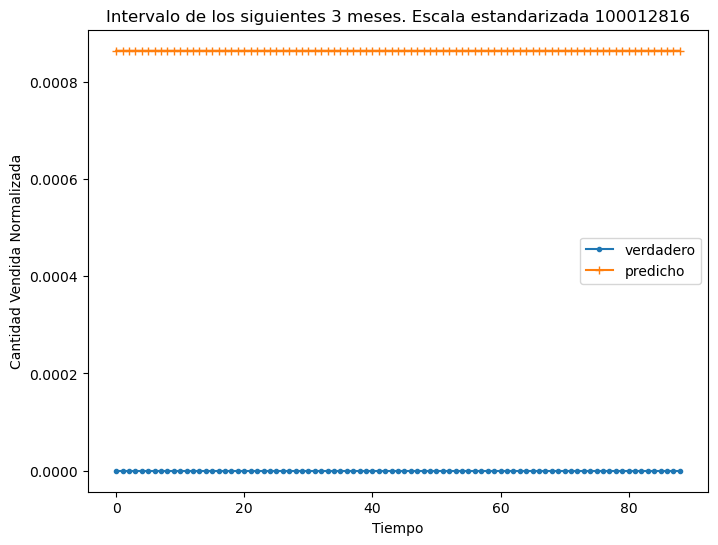

C:\Users\DIEGO.DESKTOP-E4FILMK\AppData\Local\Temp\ipykernel_14428\3260244118.py:16: RuntimeWarning: invalid value encountered in divide
  dataset = (dataset-data_mean)/data_std


Epoch 1/15
200/200 [==============================] - 9s 34ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 2/15
200/200 [==============================] - 6s 32ms/step - loss: 8.7286e-04 - val_loss: 7.1316e-04
Epoch 3/15
200/200 [==============================] - 6s 32ms/step - loss: 6.1526e-04 - val_loss: 6.5618e-04
Epoch 4/15
200/200 [==============================] - 6s 32ms/step - loss: 5.8047e-04 - val_loss: 5.7549e-04
Epoch 5/15
200/200 [==============================] - 7s 33ms/step - loss: 5.2861e-04 - val_loss: 6.1152e-04
Epoch 6/15
200/200 [==============================] - 6s 31ms/step - loss: 5.2039e-04 - val_loss: 5.8433e-04
Epoch 7/15
200/200 [==============================] - 6s 31ms/step - loss: 5.1558e-04 - val_loss: 5.8433e-04
Epoch 8/15
200/200 [==============================] - 6s 31ms/step - loss: 5.1278e-04 - val_loss: 5.8850e-04
Epoch 9/15
200/200 [==============================] - 6s 31ms/step - loss: 5.1052e-04 - val_loss: 5.9192e-04
Epoch 10/15
200/200 [======

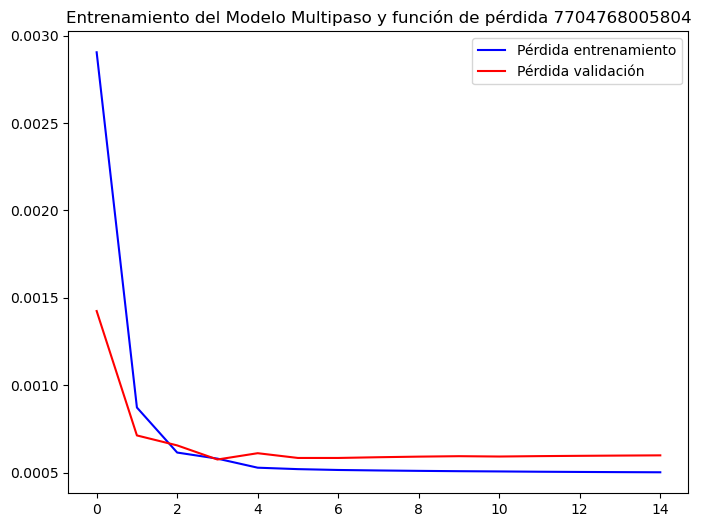

mse = 0.0005993234086963631


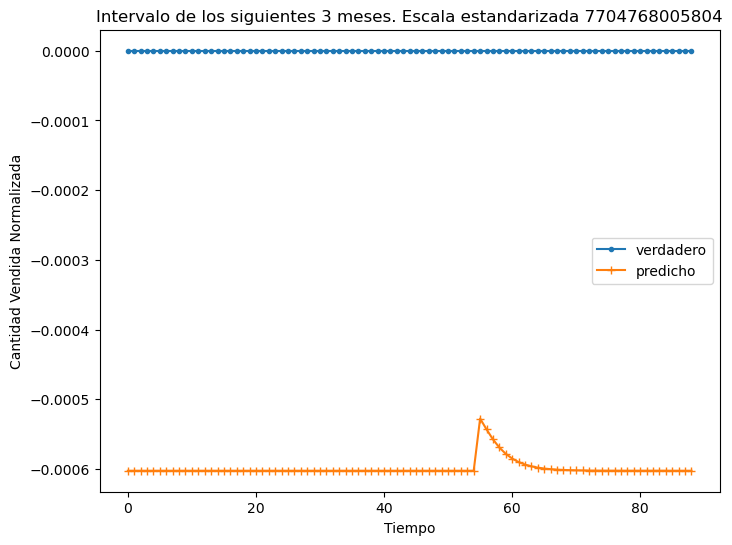

C:\Users\DIEGO.DESKTOP-E4FILMK\AppData\Local\Temp\ipykernel_14428\3260244118.py:16: RuntimeWarning: invalid value encountered in divide
  dataset = (dataset-data_mean)/data_std


Epoch 1/15
200/200 [==============================] - 9s 33ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 2/15
200/200 [==============================] - 6s 31ms/step - loss: 0.0014 - val_loss: 7.7456e-04
Epoch 3/15
200/200 [==============================] - 6s 31ms/step - loss: 5.4859e-04 - val_loss: 8.4088e-04
Epoch 4/15
200/200 [==============================] - 6s 31ms/step - loss: 5.1745e-04 - val_loss: 8.4882e-04
Epoch 5/15
200/200 [==============================] - 6s 31ms/step - loss: 5.1520e-04 - val_loss: 8.0385e-04
Epoch 6/15
200/200 [==============================] - 6s 31ms/step - loss: 5.2080e-04 - val_loss: 7.6390e-04
Epoch 7/15
200/200 [==============================] - 6s 31ms/step - loss: 5.1765e-04 - val_loss: 7.7153e-04
Epoch 8/15
200/200 [==============================] - 6s 31ms/step - loss: 5.1512e-04 - val_loss: 7.2334e-04
Epoch 9/15
200/200 [==============================] - 6s 31ms/step - loss: 5.1279e-04 - val_loss: 7.2303e-04
Epoch 10/15
200/200 [==========

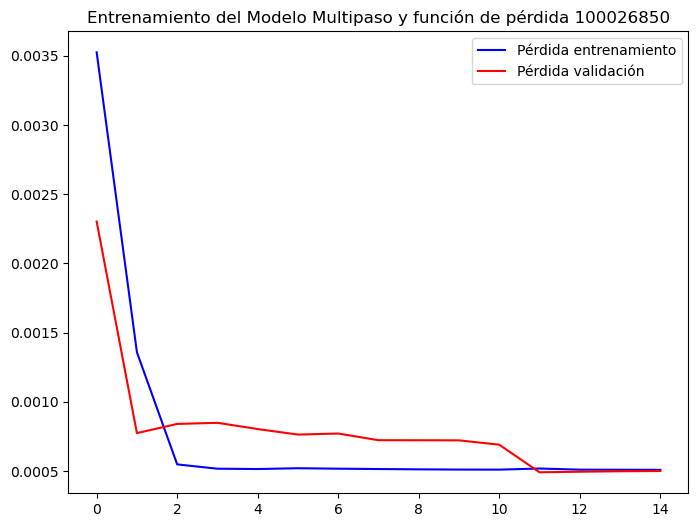

mse = 0.0005050715130016432


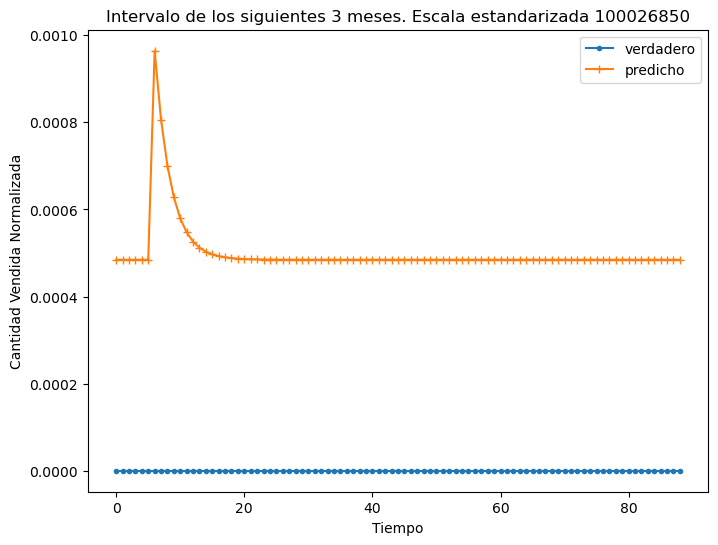

C:\Users\DIEGO.DESKTOP-E4FILMK\AppData\Local\Temp\ipykernel_14428\3260244118.py:16: RuntimeWarning: invalid value encountered in divide
  dataset = (dataset-data_mean)/data_std


Epoch 1/15
200/200 [==============================] - 8s 31ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 2/15
200/200 [==============================] - 7s 33ms/step - loss: 0.0016 - val_loss: 7.3310e-04
Epoch 3/15
200/200 [==============================] - 7s 33ms/step - loss: 7.1957e-04 - val_loss: 5.5019e-04
Epoch 4/15
200/200 [==============================] - 6s 32ms/step - loss: 5.8788e-04 - val_loss: 4.0587e-04
Epoch 5/15
200/200 [==============================] - 6s 32ms/step - loss: 5.0665e-04 - val_loss: 3.4922e-04
Epoch 6/15
200/200 [==============================] - 6s 32ms/step - loss: 5.0882e-04 - val_loss: 4.0828e-04
Epoch 7/15
200/200 [==============================] - 6s 32ms/step - loss: 5.2652e-04 - val_loss: 3.4932e-04
Epoch 8/15
200/200 [==============================] - 6s 32ms/step - loss: 5.0006e-04 - val_loss: 3.4914e-04
Epoch 9/15
200/200 [==============================] - 6s 32ms/step - loss: 5.0002e-04 - val_loss: 3.4906e-04
Epoch 10/15
200/200 [==========

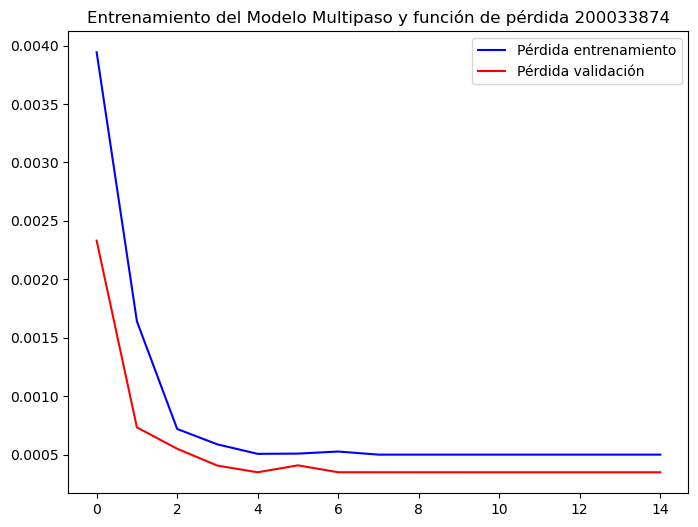

mse = 0.0003490054099196654


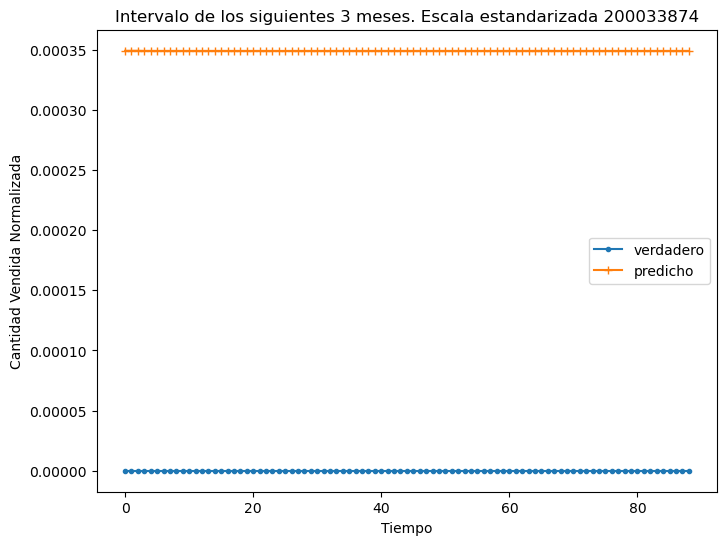

C:\Users\DIEGO.DESKTOP-E4FILMK\AppData\Local\Temp\ipykernel_14428\3260244118.py:16: RuntimeWarning: invalid value encountered in divide
  dataset = (dataset-data_mean)/data_std


Epoch 1/15
200/200 [==============================] - 8s 31ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/15
200/200 [==============================] - 6s 30ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/15
200/200 [==============================] - 6s 30ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/15
200/200 [==============================] - 6s 30ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/15
200/200 [==============================] - 6s 30ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/15
200/200 [==============================] - 6s 30ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/15
200/200 [==============================] - 6s 30ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/15
200/200 [==============================] - 6s 30ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/15
200/200 [==============================] - 6s 30ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/15
200/200

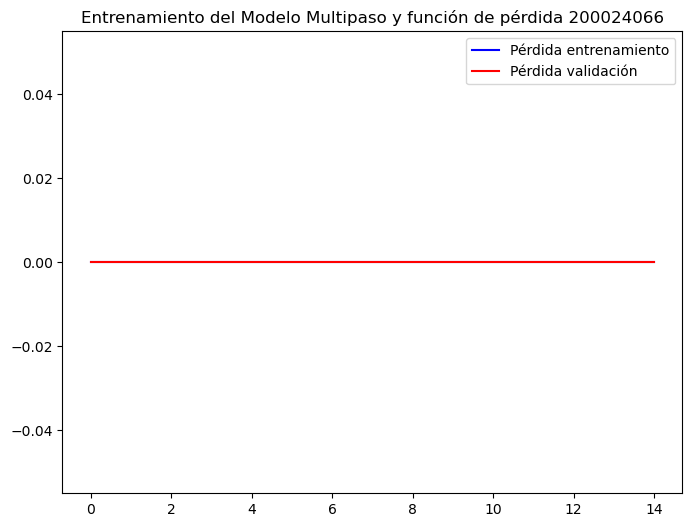

mse = 0.0


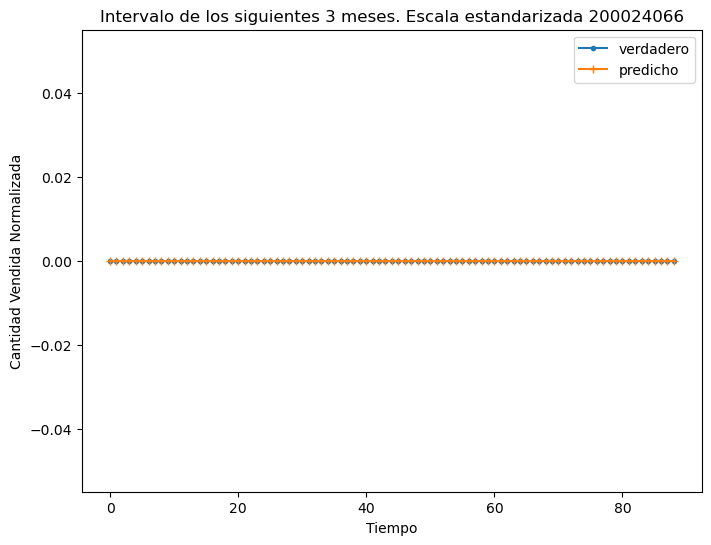

C:\Users\DIEGO.DESKTOP-E4FILMK\AppData\Local\Temp\ipykernel_14428\3260244118.py:16: RuntimeWarning: invalid value encountered in divide
  dataset = (dataset-data_mean)/data_std


Epoch 1/15
200/200 [==============================] - 8s 29ms/step - loss: 0.0017 - val_loss: 2.0718e-04
Epoch 2/15
200/200 [==============================] - 5s 27ms/step - loss: 7.6561e-04 - val_loss: 0.0012
Epoch 3/15
200/200 [==============================] - 6s 28ms/step - loss: 7.2799e-04 - val_loss: 1.5253e-04
Epoch 4/15
200/200 [==============================] - 5s 27ms/step - loss: 6.1757e-04 - val_loss: 1.3685e-04
Epoch 5/15
200/200 [==============================] - 5s 27ms/step - loss: 5.9550e-04 - val_loss: 1.1363e-04
Epoch 6/15
200/200 [==============================] - 6s 28ms/step - loss: 5.7941e-04 - val_loss: 9.8043e-05
Epoch 7/15
200/200 [==============================] - 6s 28ms/step - loss: 5.6973e-04 - val_loss: 1.0617e-04
Epoch 8/15
200/200 [==============================] - 5s 27ms/step - loss: 5.5474e-04 - val_loss: 1.0593e-04
Epoch 9/15
200/200 [==============================] - 6s 28ms/step - loss: 5.4753e-04 - val_loss: 1.0588e-04
Epoch 10/15
200/200 [======

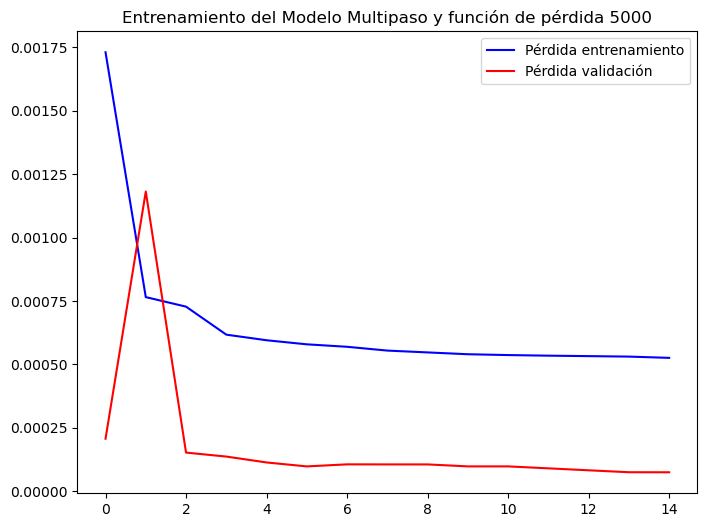

mse = 7.491547148674726e-05


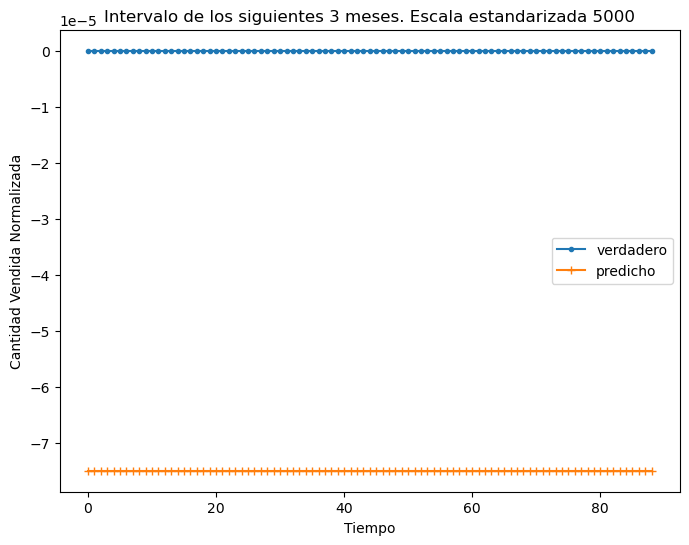

C:\Users\DIEGO.DESKTOP-E4FILMK\AppData\Local\Temp\ipykernel_14428\3260244118.py:16: RuntimeWarning: invalid value encountered in divide
  dataset = (dataset-data_mean)/data_std


Epoch 1/15
200/200 [==============================] - 7s 27ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 2/15
200/200 [==============================] - 5s 26ms/step - loss: 7.8141e-04 - val_loss: 8.1153e-04
Epoch 3/15
200/200 [==============================] - 5s 25ms/step - loss: 6.6355e-04 - val_loss: 4.5906e-04
Epoch 4/15
200/200 [==============================] - 5s 25ms/step - loss: 6.2014e-04 - val_loss: 3.8935e-04
Epoch 5/15
200/200 [==============================] - 5s 26ms/step - loss: 5.8884e-04 - val_loss: 4.6455e-04
Epoch 6/15
200/200 [==============================] - 5s 25ms/step - loss: 5.6050e-04 - val_loss: 4.7085e-04
Epoch 7/15
200/200 [==============================] - 5s 25ms/step - loss: 5.3746e-04 - val_loss: 2.8810e-04
Epoch 8/15
200/200 [==============================] - 5s 25ms/step - loss: 5.2550e-04 - val_loss: 3.2653e-04
Epoch 9/15
200/200 [==============================] - 5s 25ms/step - loss: 5.1521e-04 - val_loss: 2.5194e-04
Epoch 10/15
200/200 [======

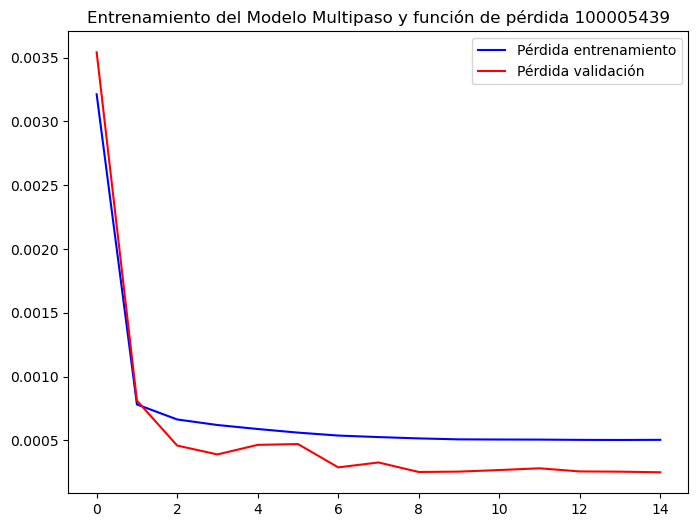

mse = 0.0002779956157776359


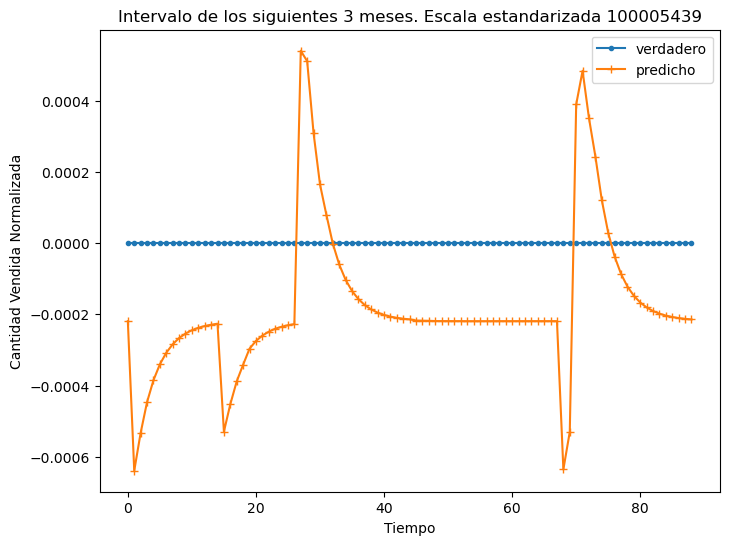

In [ ]:
for j in np.random.choice(codigos,10):
    title = "Intervalo de los siguientes 3 meses. Escala estandarizada "+j
    x_label = 'Tiempo'
    y_label = 'Cantidad Vendida Normalizada'
    ejem = Serie1(Sales,j)
    plot_train_history(ejem.multi_step_history, 'Entrenamiento del Modelo Multipaso y función de pérdida '+j)
    print("mse =",ejem.mse)
    plot_series(ejem.y_test[:2000], ejem.y_pred[:2000],title,x_label, y_label, ejem.mse,epochs=15 )

#  Ahora probamos con el SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product

import warnings
warnings.filterwarnings('ignore')

# Obtener códigos de productos únicos
codigos_productos = ventas['CodProducto'].unique()

order = (1,0,1)
seasonal_order = (1, 1, 1, 12)

mse_results_2023=[]
time_series_results_2023=[]
prediction_results_2023=[]
codigo_results_2023=[]
confianza_results_2023=[]

error_testing=[]

j=0
for codigo_producto in codigos_productos:

    predictions = []
    errors = []
    producto = ventas[ventas['CodProducto'] == codigo_producto]
    producto['FechaReporte'] = pd.to_datetime(producto['FechaReporte'])
    producto.set_index('FechaReporte', inplace=True)
    serie_tiempo = producto['CantidadVendida'].resample('W').sum()
    valores_reales = serie_tiempo['2023-01-01':]

    if ((len(producto)>2)):
        print(codigo_producto)
        modelo = SARIMAX(serie_tiempo, order=order, seasonal_order=seasonal_order)
        try:
            modelo_entrenado = modelo.fit()
            #prediccion = modelo_entrenado.predict(start='2023-01-01', end='2023-03-19')
            try:
            # Obtener la predicción y el intervalo de confianza
                prediccion = modelo_entrenado.predict(start='2023-01-01', end='2023-03-19')
                 # Obtener la predicción y el intervalo de confianza
                prediccion_resultados = modelo_entrenado.get_prediction(start='2023-01-01', end='2023-03-19')
                intervalo_confianza = prediccion_resultados.conf_int(alpha=0.05)

                # Obtener los valores reales de la serie de tiempo para el período de pronóstico
                valores_reales = serie_tiempo['2023-01-01':]
                if(len(prediccion)==len(valores_reales)):
                    j=j+1
                    print(j)
                    # Calcular el MSE entre las predicciones y los valores reales
                    mse = mean_squared_error(valores_reales, prediccion)
                    # Almacenar el MSE actual en la lista de resultados
                    mse_results_2023.append(mse)
                    time_series_results_2023.append(serie_tiempo)
                    prediction_results_2023.append(prediccion)
                    codigo_results_2023.append(codigo_producto)
                    confianza_results_2023.append(intervalo_confianza)
            except KeyError as e:
                error_testing.append(codigo_producto)
        except IndexError:
            error_testing.append(codigo_producto)


#### Grafica con todos los productos en TEST con prediccion primeros 3 meses 2023

In [ ]:
import matplotlib.pyplot as plt
indice_results=354

plt.plot(time_series_results_2023[indice_results], label='Datos reales', linewidth=0.5)
plt.plot(prediction_results_2023[indice_results], label='Predicciones', linewidth=1.5)
plt.fill_between(confianza_results_2023[indice_results].index, confianza_results_2023[indice_results].iloc[:,0], confianza_results_2023[indice_results].iloc[:,1], color='red', alpha=0.2, label='Intervalo de confianza del 95%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Predicción de ventas de producto ' + codigo_results_2023[indice_results])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()




MSE promedio del modelo SARIMAX

In [ ]:
sum(mse_results_2023)/len(mse_results_2023)

## Ahora verificamos con grid search 3 modelos de Machine Learning

In [ ]:
ventas1=ventas[ventas['PerctUtilidad']>0]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

ventas_num = ['VentaNeta',
       'CantidadVendida', 'InvActual', 'PromVentas', 'CostoVentas', 'Utilidad',
       'PerctUtilidad', 'DiasInv', 'DiasSinVenta',
       'DiasPeriodo', 'DiasVenta']

ventas_num_x = ['VentaNeta', 'InvActual', 'PromVentas', 'CostoVentas', 'Utilidad',
       'PerctUtilidad', 'DiasInv', 'DiasSinVenta',
       'DiasPeriodo', 'DiasVenta']

ventas1[ventas_num_x] = scaler.fit_transform(ventas1[ventas_num_x])   #Solo escalar entradas, label es 'CantidadVendida'

In [ ]:
ventas_semanal = ventas1.groupby(['CodProducto', pd.Grouper(key='FechaReporte', freq='W-MON')])[['CantidadVendida', 'VentaNeta', 'InvActual', 'CostoVentas', 'Utilidad', 'PerctUtilidad', 'DiasInv', 'DiasSinVenta', 'DiasVenta']].sum().reset_index()

In [ ]:
weekly_medicines = ventas1.resample('W', on='FechaReporte').agg({ 'VentaNeta': 'sum', 'CantidadVendida': 'sum', 'InvActual': 'last', 'CostoVentas': 'sum', 'DiasInv': 'mean', 'DiasSinVenta': 'mean', 'DiasPeriodo': 'last', 'DiasVenta': 'mean' })

In [ ]:
weekly_medicines['Utilidad']=weekly_medicines['VentaNeta']-weekly_medicines['CostoVentas']
weekly_medicines['PerctUtilidad']=weekly_medicines['Utilidad']/weekly_medicines['CostoVentas']
weekly_medicines['PerctUtilidad']=weekly_medicines['Utilidad']/weekly_medicines['CostoVentas']


In [ ]:
weekly_medicines1 = ventas1.groupby([pd.Grouper(key='FechaReporte', freq='W'), 'CodProducto']).agg({'VentaNeta': 'sum',
'CantidadVendida': 'sum','InvActual': 'last','CostoVentas': 'sum','DiasInv': 'mean',
'DiasSinVenta': 'mean','DiasPeriodo': 'last','DiasVenta': 'mean'}).reset_index()
weekly_medicines1['Utilidad']=weekly_medicines1['VentaNeta']-weekly_medicines1['CostoVentas']
weekly_medicines1['PerctUtilidad']=weekly_medicines1['Utilidad']/weekly_medicines1['CostoVentas']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

models={
    "rf_50_1_1":RandomForestRegressor(n_estimators=50,max_depth=1,min_samples_leaf=1),
    "rf_50_1_1":RandomForestRegressor(n_estimators=50,max_depth=1,min_samples_leaf=1),
    "rf_50_5_1":RandomForestRegressor(n_estimators=50,max_depth=5,min_samples_leaf=1),
    "rf_50_5_2":RandomForestRegressor(n_estimators=50,max_depth=5,min_samples_leaf=2),
    "rf_100_1_1":RandomForestRegressor(n_estimators=100,max_depth=1,min_samples_leaf=1),
    "rf_100_1_2":RandomForestRegressor(n_estimators=100,max_depth=1,min_samples_leaf=2),
    "rf_100_5_1":RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_leaf=1),
    "rf_100_5_2":RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_leaf=2),
    "knn_2":KNeighborsRegressor(n_neighbors=2),
    "knn_3":KNeighborsRegressor(n_neighbors=3),
    "knn_4":KNeighborsRegressor(n_neighbors=4),
    "knn_5":KNeighborsRegressor(n_neighbors=5),
    "knn_6":KNeighborsRegressor(n_neighbors=6),
    "knn_7":KNeighborsRegressor(n_neighbors=7),
    "knn_8":KNeighborsRegressor(n_neighbors=8),
    "knn_9":KNeighborsRegressor(n_neighbors=9),
    "knn_10":KNeighborsRegressor(n_neighbors=10),
    "svr_0.1_0.1":SVR(kernel='rbf',C=0.1,gamma=0.1),
    "svr_0.1_0.2":SVR(kernel='rbf',C=0.1,gamma=0.2),
    "svr_0.1_0.3":SVR(kernel='rbf',C=0.1,gamma=0.3),
    "svr_0.1_0.5":SVR(kernel='rbf',C=0.1,gamma=0.5),
    "svr_0.1_1":SVR(kernel='rbf',C=0.1,gamma=1),
    "svr_0.1_2":SVR(kernel='rbf',C=0.1,gamma=2),
    "svr_0.1_4":SVR(kernel='rbf',C=0.1,gamma=4),
    "svr_0.1_scale":SVR(kernel='rbf',C=0.1,gamma='scale'),
    "svr_1_0.1":SVR(kernel='rbf',C=1,gamma=0.1),
    "svr_1_0.2":SVR(kernel='rbf',C=1,gamma=0.2),
    "svr_1_0.3":SVR(kernel='rbf',C=1,gamma=0.3),
    "svr_1_0.5":SVR(kernel='rbf',C=1,gamma=0.5),
    "svr_1_1":SVR(kernel='rbf',C=1,gamma=1),
    "svr_1_2":SVR(kernel='rbf',C=1,gamma=2),
    "svr_1_4":SVR(kernel='rbf',C=1,gamma=4),
    "svr_1_scale":SVR(kernel='rbf',C=1,gamma='scale')
}

# models={"knn_2":KNeighborsRegressor(n_neighbors=10),}

In [ ]:
weekly_medicines1['FechaReporte'].unique()

In [ ]:
data_w=weekly_medicines1[['FechaReporte','CodProducto','DiasSinVenta', 'PerctUtilidad','Utilidad','CantidadVendida']]
train=data_w.loc[data_w['FechaReporte']<'2023-02-19T00:00:00.000000000']    #train until week of 2023-02-19
test=data_w.loc[data_w['FechaReporte']>='2023-02-19T00:00:00.000000000']   #test from 2023-02-19 until present

In [ ]:
from mlforecast import MLForecast

mlf_w = MLForecast(models=models,
                 freq='W',
                 lags=[1])

# mlf_d = MLForecast(models=models,
#                  freq='D',
#                  lags=[1,2,5,7])

mlf_d = MLForecast(models=models,
                 freq='D',
                 lags=[1])


In [ ]:
# from docs fit method does the preprocessing and the training
mlf_w.fit(data=train[['FechaReporte','CodProducto','DiasSinVenta', 'PerctUtilidad','Utilidad','CantidadVendida']],
          id_col='CodProducto',
          time_col='FechaReporte',
          target_col='CantidadVendida')
# training time: 11m 37.4s

In [ ]:
preds_w=mlf_w.predict(horizon=len(test['FechaReporte'].unique()))   #prediction time: 8-10 mins

In [ ]:
preds_w

### Graficas de los productos por codigo

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,1)
train.loc[train['CodProducto']=='100003932'].plot(x='FechaReporte',y='CantidadVendida',ax=ax,label='train')
test.loc[test['CodProducto']=='100003932'].plot(x='FechaReporte',y='CantidadVendida',ax=ax,label='test')
for key in models:
    if "rf" in key:
        preds_w.loc[preds_w['CodProducto']=='100003932'].plot(x='FechaReporte',y=key,ax=ax)
plt.show()

## Por ultimo usamos el modelo KNN para la interfaz

In [ ]:
%%capture --no-display

from skforecast.model_selection_multiseries import grid_search_forecaster_multivariate
from skforecast.ForecasterAutoregMultiVariate import ForecasterAutoregMultiVariate
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# print(ventas2['FechaReporte'].max())

# product = '100003932'  # Replace with the desired product code
print("len products",len(ventas2['productCode'].unique()))
datos_series=[]
productos=ventas2['productCode'].unique()
predicciones=[]
models=[]      # mse train: models[i]['mean_squared_error']
mse_test=[]

error_codes=[]


# param_grid={'n_estimators':[50,80,100],'max_depth':[2,5,10],'min_samples_leaf':[5,10]}
param_grid={'n_neighbors':[2,3,4,5,6,7,8]}     #param grid for cv - gridsearch

for i,product in enumerate(ventas2['productCode'].unique()):
    # print(f"product{i}: {product}")
    # if i>4:
    #     break
    product_data = ventas2[ventas2['productCode'] == product]
    product_data=product_data.set_index('FechaLunesSemana')
    # product_data=product_data.asfreq('W')
    product_data=product_data.sort_index()

    datos_series.append(product_data)   # append to series list by product for visualization

    steps=12    # weekly ->3months is 12 steps
    datos_train=product_data[:-steps]
    datos_test=product_data[-steps:]
    # print(datos_train.head())
    # print(datos_train.shape)

    try:
        forecaster2=ForecasterAutoregMultiVariate(
                        regressor=KNeighborsRegressor(),
                        level='SumaCantidadSemanal',
                        steps=steps,
                        lags=1
                    )


        results_grid=grid_search_forecaster_multivariate(
                        forecaster=forecaster2,
                        series=datos_train[['PromedioDiasSinVenta','SumaCantidadSemanal','puti','SumaUtilidadSemanal']],
                        param_grid=param_grid,
                        steps=steps,
                        refit=True,
                        metric='mean_squared_error',
                        initial_train_size=len(datos_train[:-steps*2]),
                        fixed_train_size=False,
                        return_best=True,
                        verbose=False
                    )

        results_grid.reset_index(drop=True,inplace=True)

        models.append(results_grid.loc[0])

        predictions_cv=forecaster2.predict_interval()
        predictions_cv['Codigo']=product
        predictions_cv.reset_index(names=['Dates'],inplace=True)
        predictions_cv['Dates']=datos_train.index.to_list()[-1]+pd.to_timedelta(predictions_cv['Dates'],unit='W')
        # print(predictions_cv)
        predicciones.append(predictions_cv)

        mse = mean_squared_error(datos_test['SumaCantidadSemanal'],predictions_cv['SumaCantidadSemanal'])
        mse_test.append(mse)

    except:
        error_codes.append(product)

Guardamos el JSON con las predicciones

In [ ]:
import json
data = {}

for i in range(len(predicciones)):
    codigo = predicciones[i]['Codigo'][0]    #predicciones [df[pred,pred5,pred95,fecha,Codigo],df,df,....]

    nombre = code_names.loc[code_names['productCode']==codigo,'name'].iloc[0]  #get name from code

    if nombre not in data:
        data[nombre] = {'mse': "",
                        'n_neighbors':"",
                        'time_series_dates': [],
                        'time_series_values':[],
                        'prediction_dates': [],
                        'prediction_values':[],
                        'confianza5': [],
                        'confianza95':[],
                        'codigo': "",
                        'nombre': ""}

    data[nombre]['mse']=str(models[i]['mean_squared_error'])
    data[nombre]['n_neighbors']=str(models[i]['n_neighbors'])

    data[nombre]['time_series_values'].extend(datos_series[i]['SumaCantidadSemanal'].values.tolist())
    fechas = datos_series[i].index.to_list()
    fechas_str = [fecha.strftime('%Y-%m-%d %H:%M:%S') for fecha in fechas]
    data[nombre]['time_series_dates'].extend(fechas_str)

    data[nombre]['prediction_dates'].extend([d.split('T')[0] for d in predicciones[i]['Dates'].values.astype(str)])
    data[nombre]['prediction_values'].extend(predicciones[i]['SumaCantidadSemanal'].values.tolist())
    data[nombre]['confianza5'].extend(predicciones[i]['lower_bound'].values.tolist())
    data[nombre]['confianza95'].extend(predicciones[i]['upper_bound'].values.tolist())

    data[nombre]['codigo']=codigo
    data[nombre]['nombre']=nombre

# Guardar el diccionario en un archivo JSON
with open('jc_model_results_test.json', 'w') as f:
    json.dump(data, f)

## Por ultimo quisieramos mostrar un poco del trabajo con RNN hecho anteriormente

In [ ]:
# read data
import pandas as pd
import matplotlib.pyplot as plt
ventas = pd.read_csv("ventas_modificado.csv", encoding='utf-16',delimiter=',',lineterminator=';')
ventas

In [ ]:
num_cod_productos = ventas['CodProducto'].nunique()
print('Hay', num_cod_productos, 'valores únicos en la columna CodProducto')
#Hay 4450 valores únicos en la columna CodProducto

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import datetime

# Preprocesamiento de datos
ventas = ventas.dropna() # eliminar valores faltantes
ventas = ventas[['CodProducto','FechaReporte', 'NombreProducto', 'CantidadVendida', 'VentaNeta', 'InvActual', 'PromVentas', 'CostoVentas', 'Utilidad', 'PerctUtilidad', 'DiasInv', 'DiasSinVenta']] # seleccionar características relevantes

ventas["Precio"]= ventas["VentaNeta"]/ventas['CantidadVendida']
ventas["UtilidadUni"]= ventas["Utilidad"]/ventas['CantidadVendida']


ventas = pd.get_dummies(ventas, columns=['CodProducto']) # codificar variables categóricas
ventas = ventas.rename(columns=lambda x: x.replace('CodProducto_', ''))
ventas = ventas.sort_values(by=['FechaReporte']) # ordenar por fecha
ventas['FechaReporte'] = pd.to_datetime(ventas['FechaReporte'], format='%Y-%m-%d')
ventas['FechaNumerica'] = ventas['FechaReporte'].apply(lambda x: datetime.toordinal(x)) # crea una nueva columna con las fechas como números
#ventas['FechaReporte2'] = ventas['FechaNumerica'].apply(lambda x: datetime.fromordinal(x))

# Selección de características
#X = ventas.drop(['NombreProducto','FechaReporte','CantidadVendida', 'VentaNeta', 'InvActual', 'PromVentas', 'CostoVentas','Utilidad', 'DiasInv', 'DiasSinVenta'], axis=1)
X= ventas.drop(['NombreProducto','FechaReporte','CantidadVendida', "VentaNeta","InvActual","PromVentas","DiasInv","DiasSinVenta"], axis=1)
y = ventas['CantidadVendida']

print(X)

# División de datos
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

# Normalización de datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape de datos para entrada en RNN
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Diseño del modelo
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Entrenamiento del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val), verbose=1)


Vemos un ejemplo con DOMICILIO como codigo

In [ ]:
# Filtra las filas donde PromVentas sea igual a 1
df_filtrado = X.loc[X['DOMICILIO'] == 1]

# Muestra el dataframe filtrado
#print(df_filtrado)
promedio = df_filtrado.iloc[:, :5].mean()

# Muestra el promedio
print(promedio)

# CostoVentas         1.12
# Utilidad         3678.88
# PerctUtilidad       1.00
# Precio           3560.00
# UtilidadUni      3559.00
# dtype: float64

Grafica de las predicciones y sus metricas

In [ ]:
# Graficar resultados
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.legend(loc='upper right')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss MSE')
plt.plot(val_loss, label='Validation Loss MSE')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.title('Training and Validation Loss MSE')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Evaluación del modelo
mse = model.evaluate(X_test, y_test)
print('MSE:', mse)

In [ ]:
# Hacer predicciones en X_test
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

# 306/306 [==============================] - 2s 3ms/step
# MSE: 26.453448943930997
# MAE: 1.9118812604231166
# R2: 0.7278547788682341

In [ ]:
# Nombre del producto a probar
producto = 'DOMICILIO'

# Fecha a probar
fecha = datetime(2023, 8, 5) # ejemplo de fecha futura

# Crear el DataFrame de prueba
X_prueba = pd.DataFrame(columns=X.columns)
X_prueba.loc[0, producto] = 1
X_prueba.loc[0, 'FechaNumerica'] = fecha.toordinal()
X_prueba.loc[0, 'Utilidad'] = promedio["Utilidad"]
X_prueba.loc[0, 'PerctUtilidad'] = promedio["PerctUtilidad"]
X_prueba.loc[0, 'Precio'] = promedio["Precio"]
X_prueba.loc[0, 'UtilidadUni'] = promedio["UtilidadUni"]
X_prueba.fillna(0, inplace=True)

# Normalizar los datos de prueba
X_prueba = scaler.transform(X_prueba)

# Reshape de datos para entrada en CNN
X_prueba = X_prueba.reshape(X_prueba.shape[0], 1, X_prueba.shape[1])

# Predicción con los datos de prueba
prediccion = model.predict(X_prueba)
print(X_prueba)
# Imprimir la predicción
print('La cantidad vendida del producto {} en la fecha {} es de: {}'.format(producto, fecha, prediccion[0][0]))

Graficamos un ejemplo:

In [ ]:
# Importar librerías necesarias
from datetime import datetime, timedelta
import random

# Nombre del producto a probar
producto = 'DOMICILIO'

# Fecha a partir de la cual se harán las predicciones
fecha_inicio = datetime(2023, 1, 1)

# Crear rango de fechas para los próximos 3 meses
fechas_prediccion = [fecha_inicio + timedelta(days=x) for x in range(0, 107)]

# Crear DataFrame para las predicciones
predicciones_df = pd.DataFrame(index=fechas_prediccion, columns=['CantidadVendida'])

rango = 0.1 * promedio


# Hacer predicciones con el modelo para cada fecha en el rango
for fecha in fechas_prediccion:
    # Crear el DataFrame de prueba
    X_prueba = pd.DataFrame(columns=X.columns)
    X_prueba.loc[0, producto] = 1

    X_prueba.loc[0, 'FechaNumerica'] = fecha.toordinal()
    X_prueba.loc[0, 'CostoVentas'] = random.uniform(promedio["CostoVentas"]-rango["CostoVentas"], promedio["CostoVentas"]+rango["CostoVentas"])
    X_prueba.loc[0, 'Utilidad'] = random.uniform(promedio["Utilidad"]-rango["Utilidad"], promedio["Utilidad"]+rango["Utilidad"])
    X_prueba.loc[0, 'PerctUtilidad'] = random.uniform(promedio["PerctUtilidad"]-rango["PerctUtilidad"], promedio["PerctUtilidad"]+rango["PerctUtilidad"])
    X_prueba.loc[0, 'Precio'] = random.uniform(promedio["Precio"]-rango["Precio"], promedio["Precio"]+rango["Precio"])
    X_prueba.loc[0, 'UtilidadUni'] = random.uniform(promedio["UtilidadUni"]-rango["UtilidadUni"], promedio["UtilidadUni"]+rango["UtilidadUni"])

    X_prueba.fillna(0, inplace=True)

    # Normalizar los datos de prueba
    X_prueba = scaler.transform(X_prueba)

    # Reshape de datos para entrada en CNN
    X_prueba = X_prueba.reshape(X_prueba.shape[0], 1, X_prueba.shape[1])
    # Predicción con los datos de prueba
    prediccion = model.predict(X_prueba)

    # Agregar la predicción al DataFrame de predicciones
    predicciones_df.loc[fecha, 'CantidadVendida'] = prediccion[0][0]

# Leer datos reales
ventas = pd.read_csv("realSales3.csv", encoding='utf-16',delimiter=',',lineterminator=';')

# Filtrar datos para el producto de interés
producto_especifico = ventas[(ventas['CodProducto'] == producto)]

# Convertir la columna de fecha a tipo datetime y establecerla como índice
producto_especifico['FechaReporte'] = pd.to_datetime(producto_especifico['FechaReporte'], format='%Y-%m-%d')
producto_especifico.set_index('FechaReporte', inplace=True)

# Reamostrar la serie de tiempo a la frecuencia semanal y sumar las ventas por semana
serie_tiempo = producto_especifico['CantidadVendida'].resample('W').sum()

# Unir la serie de tiempo real y las predicciones en un solo DataFrame
serie_tiempo_predicciones = pd.concat([serie_tiempo, predicciones_df], axis=0)

# Hacer un gráfico de la serie de tiempo con las predicciones incluidas
plt.plot(serie_tiempo_predicciones)
plt.show()